**Task1: Prediction using Unsupervised model**

**Author: Tanu Sharma, Data Science and Business Analyst Intern**

**Batch: #gripjuly2022**

**Predict the number of optimum of clusters and represent it visually**

In [40]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [41]:
# Read the dataset and present in sklearn library
iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_data.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [42]:
#to gain information about the dataset
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [43]:
#checking whether there is any null value 
iris_data.isnull== True

False

**There is no null data in the dataset**

In [44]:
# DESCRIBING THE DATA
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [45]:
#defining X from the data
X=iris_data.iloc[:,:]

In [46]:
#standardization of the dataset
sc=StandardScaler()
X_std=sc.fit_transform(X)
X_std=pd.DataFrame(X_std)
X_std.columns=X.columns

In [47]:
X_std

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


**Deriving the K value using elbow method**

In [48]:
# training the model using KMeans clustering
from sklearn.cluster import KMeans 
plt.figure(figsize=(12,6))
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X_std)
    wcss.append(km.inertia_)
    


D:\New folder (2)\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Figure size 864x432 with 0 Axes>

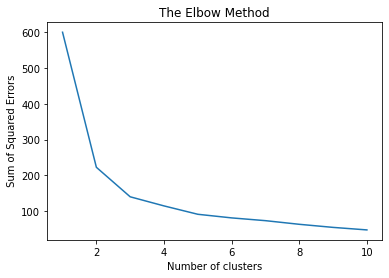

In [49]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel(' Sum of Squared Errors')
plt.show()

**As seen from the above graph the elbow curve, we can conclude that the elbow point is 3**

**Therefore, number of clusters=3**

In [50]:
#Training the algorithm
#declaring that k=3 and maximum iteration to be done is 100 and k-means++ for faster convergence
km=KMeans(n_clusters=3,max_iter=100,init='k-means++') 

In [51]:
#FITTING MODEL PREDICTION-with standardization
y_kmeans=km.fit_predict(X_std)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [52]:
#without standardization
km1=KMeans(n_clusters=3,max_iter=100,init='k-means++')
y_kmeans1=km1.fit_predict(X)
y_kmeans1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

**Virtualization of the dataset predicted**

<function matplotlib.pyplot.show(close=None, block=None)>

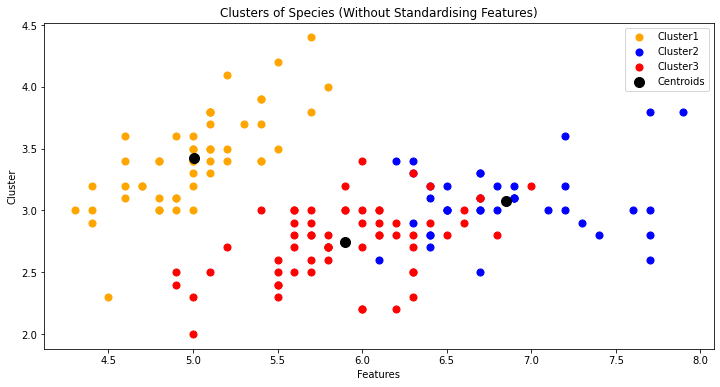

In [53]:
#Plotting with standardization
plt.figure(figsize=(12,6))

plt.scatter(X.iloc[y_kmeans1==1,0],X.iloc[y_kmeans1==1,1],s=50,c='orange',label='Cluster1')
plt.scatter(X.iloc[y_kmeans1==2,0],X.iloc[y_kmeans1==2,1],s=50,c='blue',label='Cluster2')
plt.scatter(X.iloc[y_kmeans1==0,0],X.iloc[y_kmeans1==0,1],s=50,c='red',label='Cluster3')
plt.scatter(km1.cluster_centers_[:,0],km1.cluster_centers_[:,1],marker='.',s=400,c='black',label='Centroids')

plt.title('Clusters of Species (Without Standardising Features)')
plt.xlabel('Features')
plt.ylabel('Cluster')
plt.legend()
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

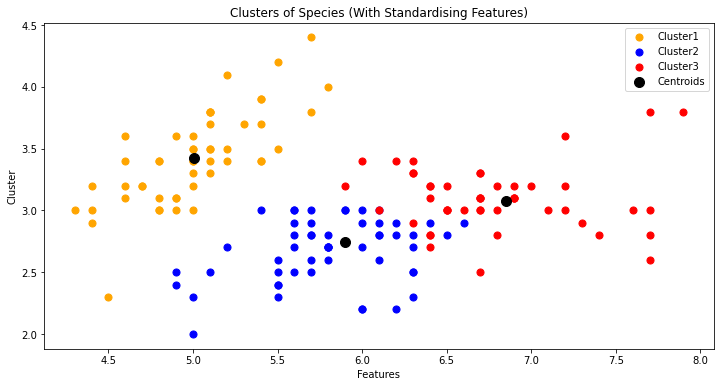

In [54]:
#Plotting without standardization

plt.figure(figsize=(12,6))

plt.scatter(X.iloc[y_kmeans==1,0],X.iloc[y_kmeans==1,1],s=50,c='orange',label='Cluster1')
plt.scatter(X.iloc[y_kmeans==2,0],X.iloc[y_kmeans==2,1],s=50,c='blue',label='Cluster2')
plt.scatter(X.iloc[y_kmeans==0,0],X.iloc[y_kmeans==0,1],s=50,c='red',label='Cluster3')
plt.scatter(km1.cluster_centers_[:,0],km1.cluster_centers_[:,1],marker='.',s=400,c='black',label='Centroids')

plt.title('Clusters of Species (With Standardising Features)')
plt.xlabel('Features')
plt.ylabel('Cluster')
plt.legend()
plt.show


**We can derive that the cluster 2 and 3 are more accurate in the standardized training model by the virtualization of the clustering**